<h2>Homework 3</h2>
<h3>Chi Ngo - cngongoc</h3>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
from nltk.tokenize import TweetTokenizer
import nltk
import spacy
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
import re
import string
import random

In [2]:
df = pd.read_csv('kindle_reviews.csv',encoding = 'unicode_escape')

<h3>1. Exploratory Data Analysis</h3>

In [3]:
df[['reviews.doRecommend','reviews.rating','reviews.numHelpful']].isnull().sum()

reviews.doRecommend    0
reviews.rating         0
reviews.numHelpful     0
dtype: int64

<p>There is no null value in these three columns</p>

In [4]:
df['reviews.doRecommend'].describe()

count      844
unique       2
top       True
freq       815
Name: reviews.doRecommend, dtype: object

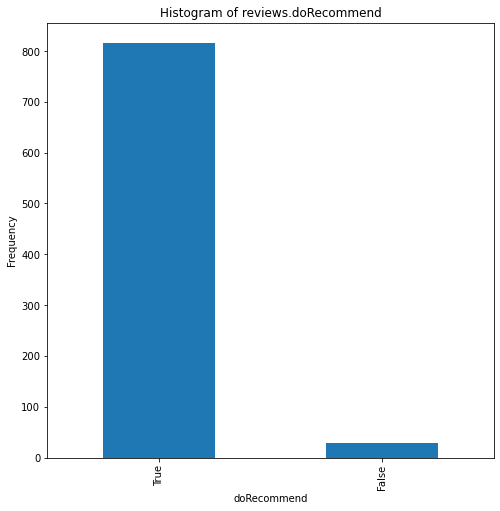

In [5]:
plt.figure(figsize=(8,8))
df['reviews.doRecommend'].value_counts().plot.bar()
plt.title('Histogram of reviews.doRecommend') 
plt.xlabel('doRecommend')
plt.ylabel('Frequency')
plt.show()

<p>There are a lot more reviews.doRecommend = True than it is False. Using this as a target variable represents an imbalanced labels problem. The trained model may be biased towards predicting new data as reviews.doRecommend = True.</p>

In [6]:
df['reviews.rating'].describe()

count    844.000000
mean       4.689573
std        0.652278
min        1.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: reviews.rating, dtype: float64

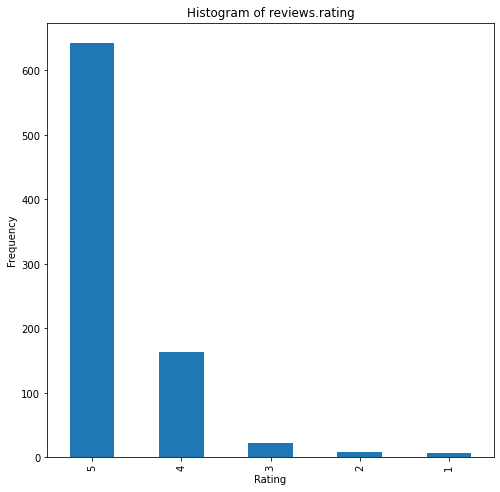

In [7]:
plt.figure(figsize=(8,8))
df['reviews.rating'].value_counts().plot.bar()
plt.title('Histogram of reviews.rating') 
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

<p>There are a lot more reviews.rating = 5 than there are other ratings. Using this as a target variable represents an imbalanced labels problem. The trained model may be biased towards predicting new data as having a 5 rating.</p>

In [8]:
df['reviews.numHelpful'].describe()

count    844.000000
mean       1.668246
std        4.673835
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       72.000000
Name: reviews.numHelpful, dtype: float64

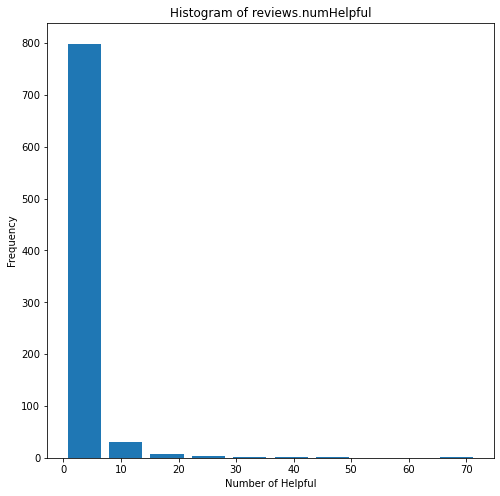

In [9]:
plt.figure(figsize=(8,8))
plt.hist(df['reviews.numHelpful'], bins = 10, rwidth=0.8)
plt.title('Histogram of reviews.numHelpful') 
plt.xlabel('Number of Helpful')
plt.ylabel('Frequency')
plt.show()

<p>There are a lot more reviews with no or less than 10 helpful votes than those with really high numbers. Using this as a target variable represents an imbalanced labels problem. The trained model may be biased towards predicting a review as having a less than 10 number of helpful votes.</p>

<h3>2. Most Frequent Words/Nouns/Adjectives</h3>

In [10]:
nlp = spacy.load('en')

words = []
adjs = []
nouns = []
t_tokenizer= TweetTokenizer()
word_counter = Counter()
adj_counter = Counter()
noun_counter = Counter()
stop = nlp.Defaults.stop_words
stop.update(['amazon','kindle','-','voyage'])

df['clean_tweets'] = df['reviews.text'].apply(lambda x: ' '.join([word for word in t_tokenizer.tokenize(x.lower()) 
                                                                  if word not in stop and len(word) > 2]))
stemmer = SnowballStemmer('english')
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: ' '.join([stemmer.stem(word) for word in t_tokenizer.tokenize(x)]))

lemmer = WordNetLemmatizer()
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: ' '.join([lemmer.lemmatize(word) for word in t_tokenizer.tokenize(x)]))

In [11]:
tweets = df['clean_tweets'].to_numpy()
for tw in tweets:
    for token in nlp(tw):
        if token.text in stop:
            continue
        words.append(token.text)
        if token.pos_ == 'ADJ':
            adjs.append(token.text)
        elif token.pos_ == 'NOUN':
            nouns.append(token.text)
    word_counter.update(words)
    adj_counter.update(adjs)
    noun_counter.update(nouns)

<p>Top 10 most frequent words:</p>

In [12]:
word_counter.most_common(10)

[('read', 227852),
 ('light', 136581),
 ('love', 118412),
 ('great', 97479),
 ('screen', 96202),
 ('book', 92208),
 ('page', 89150),
 ('easi', 83275),
 ('like', 77126),
 ('reader', 70342)]

<p>Top 10 most frequent adjectives:</p>

In [13]:
adj_counter.most_common(10)

[('great', 75655),
 ('best', 45666),
 ('light', 40550),
 ('easi', 35689),
 ('new', 34567),
 ('nice', 30224),
 ('good', 28871),
 ('worth', 24948),
 ('better', 24321),
 ('perfect', 24201)]

<p>Top 10 most frequent nouns:</p>

In [14]:
noun_counter.most_common(10)

[('screen', 95543),
 ('page', 77724),
 ('light', 69587),
 ('book', 66301),
 ('reader', 65568),
 ('love', 61385),
 ('turn', 46129),
 ('use', 41906),
 ('paperwhit', 39998),
 ('button', 39855)]

<h3>3. Most Frequent Words in Not Recommended Reviews </h3>

In [15]:
notRec = df.loc[df['reviews.doRecommend'] == False] 
tweets2 = notRec['clean_tweets'].to_numpy()
words2 = []
word_counter2 = Counter()
for tw in tweets2:
    for token in nlp(tw):
        if token.text not in stop:
            words2.append(token.text)
    word_counter2.update(words2)

<p>Top ten most frequent words in reviews that do not recommend purchase of the Kindle?</p>

In [16]:
word_counter2.most_common(10)

[('turn', 226),
 ('devic', 174),
 ('buy', 166),
 ('page', 166),
 ('read', 135),
 ('screen', 133),
 ('light', 129),
 ('replac', 125),
 ('purchas', 102),
 ('custom', 93)]

<h3>4. 5-Star Rating Prediction</h3>

In [17]:
part4_df = pd.get_dummies(df, columns=['reviews.rating'])

In [18]:
part4_df = part4_df[['clean_tweets','reviews.rating_5']]

In [19]:
part4_df.head()

,clean_tweets,reviews.rating_5
0,bought save book bit small overal satistfi,1
1,bought gift think pretti decent qualiti design,1
2,great e-read littl pricey worth money extrem l...,1
3,own kindl year best contrast clariti improv al...,1
4,replac joy flip page book live studio apart gi...,1


In [20]:
part4_df['reviews.rating_5'].value_counts()

1    642
0    202
Name: reviews.rating_5, dtype: int64

In [21]:
documents = []
for i in range(len(part4_df['clean_tweets'])):
    documents.append((list(t_tokenizer.tokenize(part4_df['clean_tweets'][i])),part4_df['reviews.rating_5'][i]))

In [22]:
random.shuffle(documents)

In [23]:
def document_features(document): 
    document_words = set(document) 
    features = {}
    for word in words:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [24]:
featuresets = [(document_features(d), c) for (d,c) in documents]
size = int(len(featuresets) * 0.2)
train_set, test_set = featuresets[size:], featuresets[:size]
classifier = nltk.NaiveBayesClassifier.train(train_set)

print(nltk.classify.accuracy(classifier, test_set))

0.7440476190476191


In [25]:
classifier.show_most_informative_features(5)

Most Informative Features
         contains(short) = True                0 : 1      =     14.4 : 1.0
         contains(remov) = True                0 : 1      =     13.9 : 1.0
      contains(interfac) = True                0 : 1      =     12.2 : 1.0
        contains(overpr) = True                0 : 1      =     12.2 : 1.0
          contains(pick) = True                0 : 1      =     12.2 : 1.0


<p>Based on the number of data in each class as explored above, it seems that we have a lot more 5-star ratings than the other ratings. Therefore, we have an imbalanced class problem. This means that Accuracy may not be an appropriate metric to evaluate the classifier's performance. Since there is a lower number of 0/negative class, we can use Specificity and F-measure to see how effective our classfier is with classifying these 2 classes. </p>

<h3>5. At Least 2 Helpful Prediction</h3>

In [26]:
part5_df = df[['clean_tweets','reviews.numHelpful']]

In [27]:
pd.set_option('mode.chained_assignment', None)
part5_df['at least 2 helpful'] = [1 if x >= 2 else 0 for x in df['reviews.numHelpful']]

In [28]:
part5_df.head()

,clean_tweets,reviews.numHelpful,at least 2 helpful
0,bought save book bit small overal satistfi,0,0
1,bought gift think pretti decent qualiti design,0,0
2,great e-read littl pricey worth money extrem l...,0,0
3,own kindl year best contrast clariti improv al...,0,0
4,replac joy flip page book live studio apart gi...,3,1


In [29]:
part5_df['at least 2 helpful'].value_counts()

0    647
1    197
Name: at least 2 helpful, dtype: int64

In [30]:
documents2 = []
for i in range(len(part5_df['clean_tweets'])):
    documents2.append((list(t_tokenizer.tokenize(part5_df['clean_tweets'][i])),part5_df['at least 2 helpful'][i]))
random.shuffle(documents2)

In [31]:
featuresets = [(document_features(d), c) for (d,c) in documents2]
size = int(len(featuresets) * 0.2)
train_set, test_set = featuresets[size:], featuresets[:size]
classifier = nltk.NaiveBayesClassifier.train(train_set)

print(nltk.classify.accuracy(classifier, test_set))

0.7619047619047619


In [32]:
classifier.show_most_informative_features(5)

Most Informative Features
        contains(matter) = True                1 : 0      =     22.8 : 1.0
        contains(switch) = True                1 : 0      =     22.8 : 1.0
         contains(remov) = True                1 : 0      =     20.7 : 1.0
         contains(flush) = True                1 : 0      =     18.5 : 1.0
       contains(appreci) = True                1 : 0      =     16.3 : 1.0


<p>Based on the number of data in each class as explored above, it seems that we have a lot more 0 or 1 helpful number. Therefore, we have an imbalanced class problem. This means that Accuracy may not be an appropriate metric to evaluate the classifier's performance. Since there is a lower number of 1/positive class, we can use Sensitivity and F-measure to see how effective our classfier is with classifying these 2 classes. </p>